In [19]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [20]:
df = yf.download(['PG', 'MSFT', 'F', 'GE'], start='1995-1-1')

[*********************100%***********************]  4 of 4 completed


In [21]:
df = df['Adj Close']
df.head(10).round(3)

,F,GE,MSFT,PG
Date,,,,
1995-01-03,3.921,25.513,2.342,7.723
1995-01-04,4.027,25.513,2.359,7.661
1995-01-05,3.992,25.575,2.320,7.553
1995-01-06,3.992,25.450,2.359,7.568
1995-01-09,4.062,25.200,2.344,7.537
1995-01-10,3.992,25.388,2.373,7.630
1995-01-11,3.992,25.763,2.388,7.615
1995-01-12,3.957,25.700,2.383,7.692
1995-01-13,4.027,26.013,2.442,7.782


In [22]:
df.tail(10).round(3)

,F,GE,MSFT,PG
Date,,,,
2023-06-29,14.95,107.660,335.05,149.38
2023-06-30,15.13,109.769,340.54,151.74
2023-07-03,15.24,108.200,337.99,152.50
2023-07-05,15.35,108.570,338.15,152.24
2023-07-06,14.98,107.291,341.27,151.99
2023-07-07,14.98,108.190,337.22,148.80
2023-07-10,15.07,110.530,331.83,148.86
2023-07-11,15.23,111.220,332.47,148.08
2023-07-12,15.22,111.200,337.20,148.85


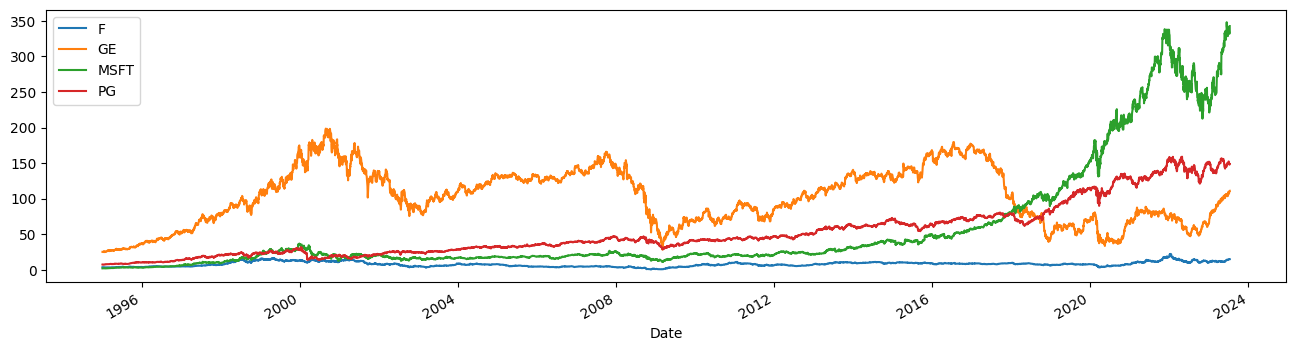

In [23]:
df.plot(figsize=(16,4))
plt.show()

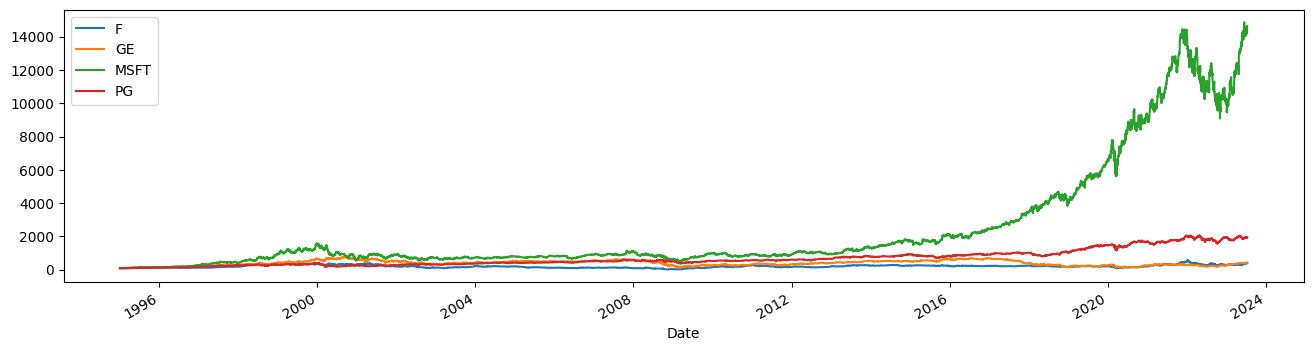

In [24]:
(df/df.iloc[0]*100).plot(figsize=(16,4))
plt.show()

# return of portfolio

In [25]:
portfolio = (df/df.shift(1)) - 1

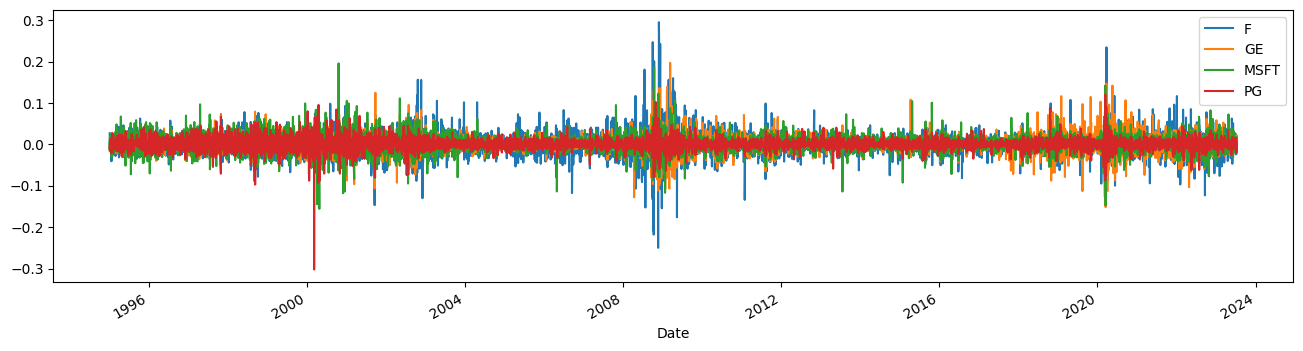

In [26]:
portfolio.plot(figsize=(16, 4))
plt.show()

In [27]:
F = 2 #int(input('if you have ... lot of F in 1995 '))
GE = 3 #int(input('if you have ... lot of GE in 1995 '))
MSFT = 2 #int(input('if you have ... lot of MSFT in 1995 '))
PG = 1 #int(input('if you have ... lot of PG in 1995 '))
total = F + GE + MSFT + PG

In [28]:
print(total)

8


In [29]:
f = F / total
ge = GE / total
msft = MSFT / total
pg =  PG / total

In [30]:
weights = np.array([f, ge, msft, pg])

In [31]:
len(np.dot(portfolio, weights))

7182

In [32]:
working_day = 250
percentage = 100
annual = portofolio.mean() * working_day

In [33]:
annual_percentage = (np.dot(annual, weights) * percentage).round(3)
print('the percentage of annual return is ', annual_percentage, '%')

the percentage of annual return is  14.213 %


In [34]:
first_f, last_f = df['F'].iloc[0], df['F'].iloc[-2] # the value of today is not released yet
first_ge, last_ge = df['GE'].iloc[0], df['GE'].iloc[-2] # the value of today is not released yet
first_msft, last_msft = df['MSFT'].iloc[0], df['MSFT'].iloc[-2] # the value of today is not released yet
first_pg, last_pg = df['PG'].iloc[0], df['PG'].iloc[-2] # the value of today is not released yet

In [35]:
total_f = (last_f-first_f)*F
total_ge = (last_ge-first_ge)*GE
total_msft = (last_msft-first_msft)*MSFT
total_pg = (last_pg-first_pg)*PG

In [36]:
print(f'if you bought {F} lot(s) of F, {GE} lot(s) of GE, {MSFT} lot(s) of MSFT, and {PG} lot(s) of PG')
print('in 1995 and you never sold it, your total wealth now is')
print(f'$ {(total_f+total_ge+total_msft+total_pg).round(3)}')

if you bought 2 lot(s) of F, 3 lot(s) of GE, 2 lot(s) of MSFT, and 1 lot(s) of PG
in 1995 and you never sold it, your total wealth now is
$ 1090.502


# risk analysis

In [40]:
df.describe().round(3)

,F,GE,MSFT,PG
count,7182.000,7182.000,7182.000,7182.000
mean,8.207,101.980,57.257,52.894
std,3.335,39.344,78.271,37.441
min,0.765,25.138,2.296,7.537
25%,5.389,71.484,17.372,25.249
50%,8.000,100.890,21.836,41.620
75%,10.264,132.601,48.908,67.969
max,22.665,198.683,348.100,159.210


In [39]:
df.corr().round(3)

,F,GE,MSFT,PG
F,1.000,0.311,0.435,0.362
GE,0.311,1.000,-0.261,-0.160
MSFT,0.435,-0.261,1.000,0.932
PG,0.362,-0.160,0.932,1.000


In [41]:
df.cov().round(3)

,F,GE,MSFT,PG
F,11.123,40.762,113.477,45.143
GE,40.762,1547.919,-802.371,-236.376
MSFT,113.477,-802.371,6126.346,2730.823
PG,45.143,-236.376,2730.823,1401.818
